# Отчёт по ЛР №1 по ТМО
Водка Игорь, ИУ5-61

# 1) Текстовое описание набора данных

В качестве набора данных возьмём набор World University Rankings с Kaggle: https://www.kaggle.com/mylesoneill/world-university-rankings/home
Мне интересна эта тема.

Датасет состоит лишь из одного файла: `timesData.csv`, который нам предстоит разделить на обучающую и тестовую выборки.
В выборке содержится множество колонок:

* world_rank - рейтинг (или вилка)
* university_name - название университета
* country - страна
* teaching - рейтинг качества преподавания
* international	- рейтинг международного признания
* research - рейтинг исследований
* citations	- industry income (knowledge transfer)
* income - доход
* total_score - общий счёт в рейтинге (целевой признак!)
* num_students - число студентов
* student_staff_ratio - кол-во студентов на одного преподавателя 
* international_students - процент студентов из других стран
* female_male_ratio - отношение количества студентов мужского пола к женскому	
* year - бесполезно

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Делим выборку на обучающую и тестовую

In [2]:
from sklearn.model_selection import train_test_split

# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('timesData.csv', sep=",", thousands=',')
# train, test = train_test_split(df, test_size=0.2)

## 2) Основные характеристики датасета

Так, давайте посмотрим...

In [3]:
# Первые 5 строк датасета
data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27%,45 : 55,2011


In [4]:
# Размер датасета
data.shape

(2603, 14)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2603


In [6]:
# Список колонок
data.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

world_rank - 0
university_name - 0
country - 0
teaching - 0
international - 0
research - 0
citations - 0
income - 0
total_score - 0
num_students - 59
student_staff_ratio - 59
international_students - 67
female_male_ratio - 233
year - 0


In [8]:
# Многовато... Давайте пока выкинем NaN просто.

data = data.fillna(data.mean())
data = data.dropna()

# Немного уменьшилась наша выборка... ну и ладно.
data.shape

(2362, 14)

In [9]:
# Интерполируем international, research, citations, income, total_score

def adjust_total_score(df_line):
    cols = ['international', 'research', 'citations', 'income', 'total_score']
    
    for col in cols:
        if df_line[col] == '-':
            # get all non-hyphen similar rating cols
            non_empty_cols = filter(lambda x: x != '-', map(lambda colName: df_line[colName], cols)) 
            # floatify
            non_empty_cols = list(map(lambda s: float(s), non_empty_cols))
            # interpolate
            df_line[col] = sum(non_empty_cols) / len(non_empty_cols)
            
    return df_line
        
fixed_data = data.apply(adjust_total_score, axis=1)

In [10]:
fixed_data

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,89.95,94.2,7929.0,8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,81.95,91.1,36186.0,16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,82.475,89.5,11751.0,4.4,20%,50 : 50,2011
10,11,"University of California, Los Angeles",United States of America,83.0,48.1,92.9,93.2,80.475,87.7,38206.0,10.3,15%,52 : 48,2011


In [11]:
# Основные статистические характеристки набора данных
fixed_data.describe()

,teaching,research,citations,num_students,student_staff_ratio,year
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,37.146190,35.310288,61.004953,23845.077053,18.707282,2014.092295
std,17.145579,20.876934,23.091455,18008.833624,11.530523,1.682795
min,9.900000,2.900000,1.200000,462.000000,0.600000,2011.000000
25%,24.500000,19.400000,45.500000,12551.000000,12.200000,2013.000000
50%,33.100000,30.100000,62.700000,20584.000000,16.300000,2014.000000
75%,45.700000,46.200000,79.200000,30333.000000,21.900000,2016.000000
max,98.300000,99.400000,100.000000,379231.000000,162.600000,2016.000000


In [12]:
# Определим уникальные значения для целевого признака
data['world_rank'].unique()

array(['2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14',
       '15', '19', '20', '21', '22', '23', '24', '25', '27', '28', '29',
       '30', '32', '33', '34', '35', '36', '39', '40', '42', '43', '47',
       '48', '49', '51', '52', '53', '54', '56', '58', '59', '60', '61',
       '63', '64', '65', '66', '67', '68', '71', '72', '73', '75', '76',
       '77', '78', '79', '81', '83', '85', '87', '88', '90', '93', '95',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '109', '111', '112', '114', '115', '117', '118', '119', '120',
       '122', '124', '127', '128', '129', '130', '132', '135', '137',
       '138', '139', '140', '142', '143', '144', '145', '147', '149',
       '151', '152', '155', '156', '159', '161', '163', '164', '165',
       '167', '168', '170', '171', '172', '173', '174', '177', '178',
       '181', '182', '183', '184', '185', '186', '187', '189', '190',
       '193', '195', '196', '197', '199', '1', '7', '16', '17', '18'

In [13]:
fixed_data

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,89.95,94.2,7929.0,8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,81.95,91.1,36186.0,16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,82.475,89.5,11751.0,4.4,20%,50 : 50,2011
10,11,"University of California, Los Angeles",United States of America,83.0,48.1,92.9,93.2,80.475,87.7,38206.0,10.3,15%,52 : 48,2011


In [14]:
# Чуть поправляем данные

fixed_data.international_students = fixed_data.international_students.str.replace('\%','')

numeric_cols = ['teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'international_students']
fixed_data[numeric_cols] = fixed_data[numeric_cols].apply(pd.to_numeric)

fixed_data.dtypes

def fix_female_male_ratio(x):
    if x == '-':
        return 1
    else:
        split = x.split(' : ')
        f = int(split[0])
        m = int(split[1])
        if m == 0:
            m = 0.01
        return f / m
    
def fix_world_rank(x):
    return int(x.split('-')[0].replace('=', ''))

fixed_data.female_male_ratio = fixed_data.female_male_ratio.apply(fix_female_male_ratio)
fixed_data.world_rank = fixed_data.world_rank.apply(fix_world_rank)

In [15]:
def group_all_years(years):
    sorted_years = years.sort_values('year', ascending=False)
    first_year = sorted_years.head(1)
    last_year = sorted_years.tail(1)
    for col in ['teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'international_students']:
        last_year[col + '_progress'] = years.iloc[0][col] / years.iloc[-1][col]
    return last_year
    
fixed_data_with_progress = fixed_data.groupby('university_name').apply(group_all_years)
fixed_data_with_progress = fixed_data_with_progress.drop('year', axis=1)
fixed_data_with_progress

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


,,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,...,international_students,female_male_ratio,teaching_progress,international_progress,research_progress,citations_progress,income_progress,total_score_progress,num_students_progress,international_students_progress
university_name,,,,,,,,,,,,,,,,,,,,,,
AGH University of Science and Technology,2405,601,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,19.100000,19.100000,35569.0,...,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Aalborg University,501,301,Aalborg University,Denmark,19.0,75.3,20.0,27.1,36.400000,39.700000,17422.0,...,15,0.923077,0.756972,1.060563,0.704225,0.367209,0.832952,0.732135,1.0,1.0
Aalto University,502,301,Aalto University,Finland,26.2,49.0,22.2,37.5,61.900000,42.650000,16099.0,...,17,0.470588,0.842444,0.749235,0.676829,0.603865,1.004870,0.768815,1.0,1.0
Aarhus University,166,167,Aarhus University,Denmark,38.1,33.4,55.6,57.3,61.500000,49.900000,23895.0,...,14,1.173913,1.032520,0.434896,1.096647,0.718045,0.900439,0.864818,1.0,1.0
Aberystwyth University,476,276,Aberystwyth University,United Kingdom,19.8,63.8,15.5,56.6,35.500000,42.850000,9252.0,...,18,0.923077,0.916667,0.883657,0.820106,0.842262,1.134185,0.904008,1.0,1.0
Adam Mickiewicz University,2404,601,Adam Mickiewicz University,Poland,20.0,25.7,11.0,15.3,28.700000,20.175000,40633.0,...,1,2.448276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Aix-Marseille University,2057,251,Aix-Marseille University,France,36.7,63.0,22.1,64.9,33.100000,45.775000,71749.0,...,13,1.564103,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Ajou University,2406,601,Ajou University,South Korea,19.5,20.0,11.9,23.9,45.700000,25.375000,12706.0,...,2,0.492537,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Alexandria University,146,147,Alexandria University,Egypt,29.5,19.3,28.0,99.8,36.000000,51.600000,127431.0,...,1,0.851852,1.453202,0.572700,3.414634,7.078014,1.212121,2.408401,1.0,1.0


# 3) Визуальное исследование датасета

In [16]:
data = fixed_data_with_progress
data

,,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,...,international_students,female_male_ratio,teaching_progress,international_progress,research_progress,citations_progress,income_progress,total_score_progress,num_students_progress,international_students_progress
university_name,,,,,,,,,,,,,,,,,,,,,,
AGH University of Science and Technology,2405,601,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,19.100000,19.100000,35569.0,...,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Aalborg University,501,301,Aalborg University,Denmark,19.0,75.3,20.0,27.1,36.400000,39.700000,17422.0,...,15,0.923077,0.756972,1.060563,0.704225,0.367209,0.832952,0.732135,1.0,1.0
Aalto University,502,301,Aalto University,Finland,26.2,49.0,22.2,37.5,61.900000,42.650000,16099.0,...,17,0.470588,0.842444,0.749235,0.676829,0.603865,1.004870,0.768815,1.0,1.0
Aarhus University,166,167,Aarhus University,Denmark,38.1,33.4,55.6,57.3,61.500000,49.900000,23895.0,...,14,1.173913,1.032520,0.434896,1.096647,0.718045,0.900439,0.864818,1.0,1.0
Aberystwyth University,476,276,Aberystwyth University,United Kingdom,19.8,63.8,15.5,56.6,35.500000,42.850000,9252.0,...,18,0.923077,0.916667,0.883657,0.820106,0.842262,1.134185,0.904008,1.0,1.0
Adam Mickiewicz University,2404,601,Adam Mickiewicz University,Poland,20.0,25.7,11.0,15.3,28.700000,20.175000,40633.0,...,1,2.448276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Aix-Marseille University,2057,251,Aix-Marseille University,France,36.7,63.0,22.1,64.9,33.100000,45.775000,71749.0,...,13,1.564103,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Ajou University,2406,601,Ajou University,South Korea,19.5,20.0,11.9,23.9,45.700000,25.375000,12706.0,...,2,0.492537,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
Alexandria University,146,147,Alexandria University,Egypt,29.5,19.3,28.0,99.8,36.000000,51.600000,127431.0,...,1,0.851852,1.453202,0.572700,3.414634,7.078014,1.212121,2.408401,1.0,1.0


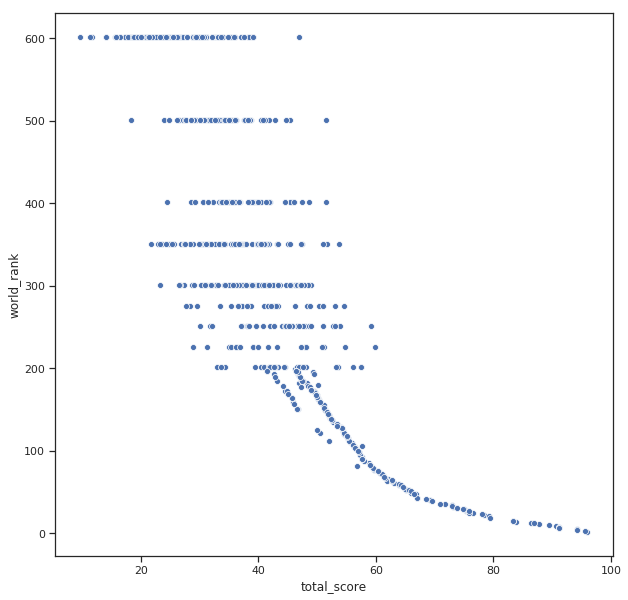

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='total_score', y='world_rank', data=data)

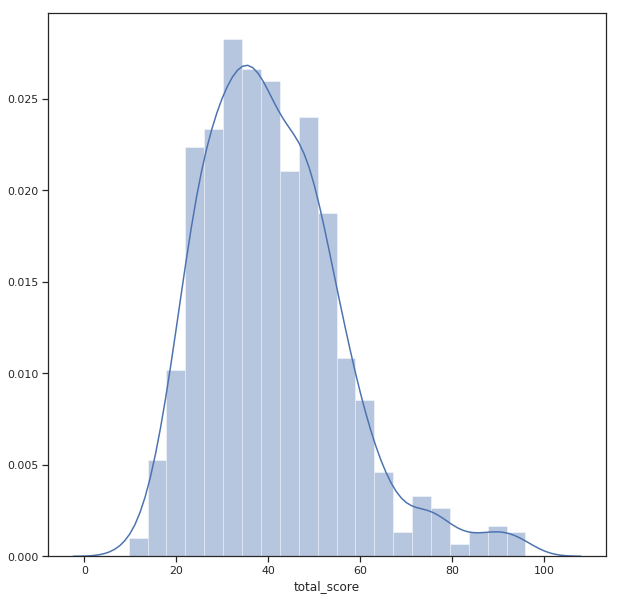

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['total_score'])

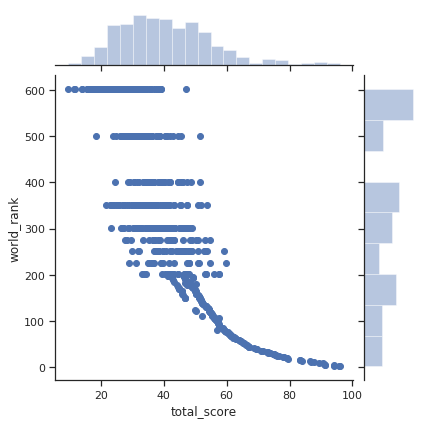

In [19]:
sns.jointplot(x='total_score', y='world_rank', data=data)

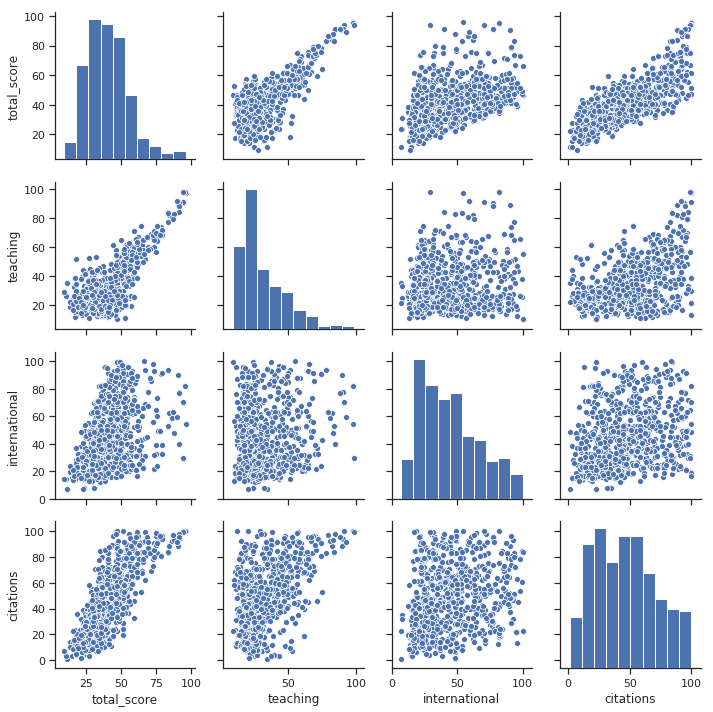

In [20]:
sns.pairplot(data[['total_score', 'teaching', 'international', 'citations']])

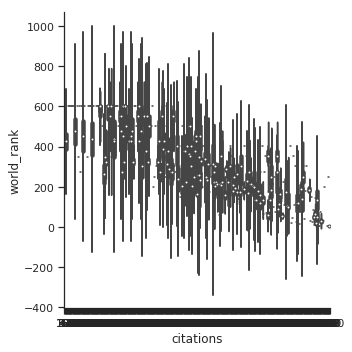

In [21]:
sns.catplot(y='world_rank', x='citations', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

In [22]:
data.corr()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,teaching_progress,international_progress,research_progress,citations_progress,income_progress,total_score_progress,num_students_progress,international_students_progress
world_rank,1.000000,-0.732092,-0.365120,-0.785236,-0.805942,-0.317702,-0.853945,0.065192,0.080110,-0.393047,0.003110,-0.231821,0.308062,-0.177708,0.056633,-0.065488,0.023829,NaN,NaN
teaching,-0.732092,1.000000,0.143880,0.908191,0.521600,0.408316,0.770419,-0.020426,-0.232529,0.275345,-0.018707,0.438598,-0.225894,0.246676,-0.102778,0.108176,0.056909,NaN,NaN
international,-0.365120,0.143880,1.000000,0.240472,0.273609,0.013415,0.484897,-0.137339,0.056522,0.803313,-0.014194,-0.096220,0.156078,-0.109139,-0.131552,-0.059840,-0.179233,NaN,NaN
research,-0.785236,0.908191,0.240472,1.000000,0.561164,0.444592,0.846262,0.005305,-0.136723,0.339426,-0.018145,0.365263,-0.268961,0.267249,-0.118460,0.123628,0.027362,NaN,NaN
citations,-0.805942,0.521600,0.273609,0.561164,1.000000,0.167780,0.792220,-0.099872,-0.055355,0.279234,0.016426,0.177647,-0.189165,0.192014,0.191262,0.110871,0.219279,NaN,NaN
income,-0.317702,0.408316,0.013415,0.444592,0.167780,1.000000,0.498773,-0.005632,-0.008549,0.058790,0.033576,0.177694,-0.072636,0.035306,-0.054486,0.361134,0.082414,NaN,NaN
total_score,-0.853945,0.770419,0.484897,0.846262,0.792220,0.498773,1.000000,-0.075964,-0.087236,0.503380,0.005745,0.236082,-0.205629,0.172600,-0.004056,0.177728,0.114138,NaN,NaN
num_students,0.065192,-0.020426,-0.137339,0.005305,-0.099872,-0.005632,-0.075964,1.000000,0.479406,-0.160401,-0.010106,-0.011720,-0.011378,0.002694,0.089184,-0.024602,0.025324,NaN,NaN
student_staff_ratio,0.080110,-0.232529,0.056522,-0.136723,-0.055355,-0.008549,-0.087236,0.479406,1.000000,-0.061400,-0.014131,-0.163787,0.124050,-0.223171,0.010403,-0.135528,-0.107765,NaN,NaN
international_students,-0.393047,0.275345,0.803313,0.339426,0.279234,0.058790,0.503380,-0.160401,-0.061400,1.000000,-0.023242,-0.014778,-0.120322,-0.044723,-0.144924,-0.025478,-0.181108,NaN,NaN


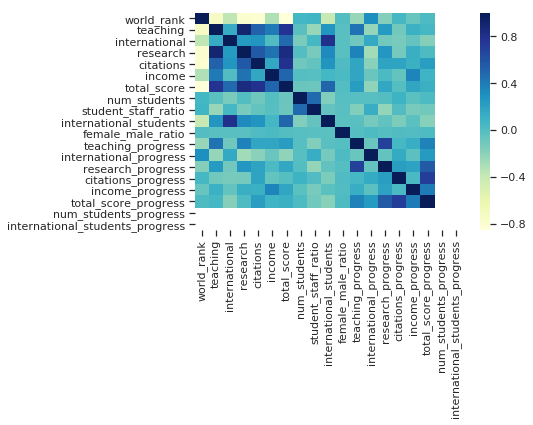

In [23]:
sns.heatmap(data.corr(), cmap='YlGnBu', fmt='.0f')